In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
muestra = np.array( [[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 

In [4]:
flat_muestra = muestra.flatten()

In [5]:
muestra_flat = list(flat_muestra)


In [47]:
#muestra.flatten()
muestra.reshape(-1)

array([1.85, 1.8 , 1.8 , 1.8 , 1.73, 1.7 , 1.75, 1.76, 1.65, 1.69, 1.67,
       1.6 , 1.54, 1.57, 1.58, 1.59, 1.4 , 1.42, 1.45, 1.48])

#### Media Aritmetica:
Es la sumatoria de todos los elementos del conjunto de datos (muestra) divididos por la cantidad total de elementos de la muestra.

In [6]:
# media
np.mean(muestra)
muestra.mean()

1.6415

In [7]:
# La media se puede calcular utilizando librerias, pero tambien puede calcularse utilizando una funcion programable

def media(lista):
    suma = 0
    cantidad_elementos = 0
    for x in lista:
        suma = suma + x
        cantidad_elementos += 1
    return (suma/cantidad_elementos)

In [8]:
def calcular_promedio(muestra):
    # Para un arrreglo de 2D
    suma, cant = 0, 0
    for fila in muestra:
        for num in fila:
            suma += num
            cant += 1
    promedio = suma / cant

    return promedio

print(calcular_promedio(muestra)) # Hecho a mano

1.6415


In [10]:
media(flat_muestra)

1.6415

#### Mediana
En este ejemplo tenemos un arreglo con cantidad de elementos pares.<br>
Por lo tanto, en este ejemplo, se va a calcular el promedio entre el par de elementos que esta mas al centro y eso es lo que devuelve como *MEDIANA*<br>
Sino, cuando el arreglo tiene una cantidad impar de elementos, el valor es el que quede en el medio de la muestra de datos, que corte a la mitad exacta la muestra de datos. <br>

In [11]:
# mediana
np.median(muestra)

1.66

In [12]:
from scipy import stats
from statistics import mode

#### Moda<br>
La podemos calcular calculando la cantidad de veces que se repiten los elementos en la muestra, y de esas repeticiones, encontrar la que se repite el maximo de veces, esa sera la *MODA* de la muestra.<br>
A veces, la moda puede no ser unica.<br>

In [13]:
# moda
# Using pandas value_counts()
import pandas as pd
muestras_df = pd.Series(muestra.flatten())
print("la moda de la muestra es ",muestras_df.iloc[muestras_df.value_counts().max()])

la moda de la muestra es  1.8


In [14]:
# moda
# Con la funcion mode de scipy

mode(list(flat_muestra))

1.8

In [15]:
# con la libreria stats
stats.mode(flat_muestra,keepdims=False)

ModeResult(mode=1.8, count=3)

In [16]:
# Programando
lis = list(flat_muestra)

def moda(array): 
  '''La funcion llamada 'moda' recibe como argumento un array de numeros enteros
  y debe devolver el número que mas veces aparece (el más frecuente).
  ej:
  masFrecuente([1,1,2,3,4]) => 1
  masFrecuente([3,2,3,2,3,3]) => 3
  Nota: Los numeros pueden NO estar ordenados '''
  
  # Tu código aca:
  mas_repe = 0
  cantidad = 0
  array.sort(reverse=False)
  for x in array:
    if array.count(x) > cantidad:
      mas_repe = x
      cantidad = array.count(x)
  print(mas_repe)
  

In [17]:
moda(lis)

1.8


In [48]:
# code Review function
def obtener_moda(arr):
    # toma como input un arreglo 2D
    numeros = [valor for fila in arr for valor in fila] # hace flat al arr que es 2D
    unicos = list(set(numeros)) # arma una lista con todos los elementos existentes sin sus repeticiones
    
    moda, maximo = 0 , 0
    
    for indice, numero in enumerate(unicos):
        conteo = numeros.count(numero)
        if conteo > maximo:
            maximo = conteo
            moda = unicos[indice]
    return (moda, maximo)

obtener_moda(muestra)
         

(1.8, 3)

In [19]:
# varianza 
# que tan alejados estan los puntos de la linea media

np.var(muestra)

0.017642750000000006

In [20]:
# desvio estandard

np.std(muestra)
print(np.std(muestra))

# Desvio estandar

np.sqrt(np.var(muestra)) # Le aplicamos raiz cuadrada a la varianza y nos da el desvio estandard
print(np.sqrt(np.var(muestra))) 

In [21]:
# coeficiente = Desv Estandard / Media * 100
# es una medida que se utiliza para comparar distintas muestras de manera mas estandarizada
# mide la variabilidad y dispersion de la muestra.

coef = np.std(muestra) / np.mean(muestra) * 100
coef

8.09174620885404

In [22]:
# Rango de numeros
rango = np.max(muestra) - np.min(muestra)
print(np.max(muestra), np.min(muestra))
print(rango)

1.85 1.4
0.4500000000000002


2. Convierta el arreglo en una lista y realice un Histograma de 5 intervalos. ¿Tiene distribución normal?.
<br>
<br>
https://datatofish.com/plot-histogram-python/<br>

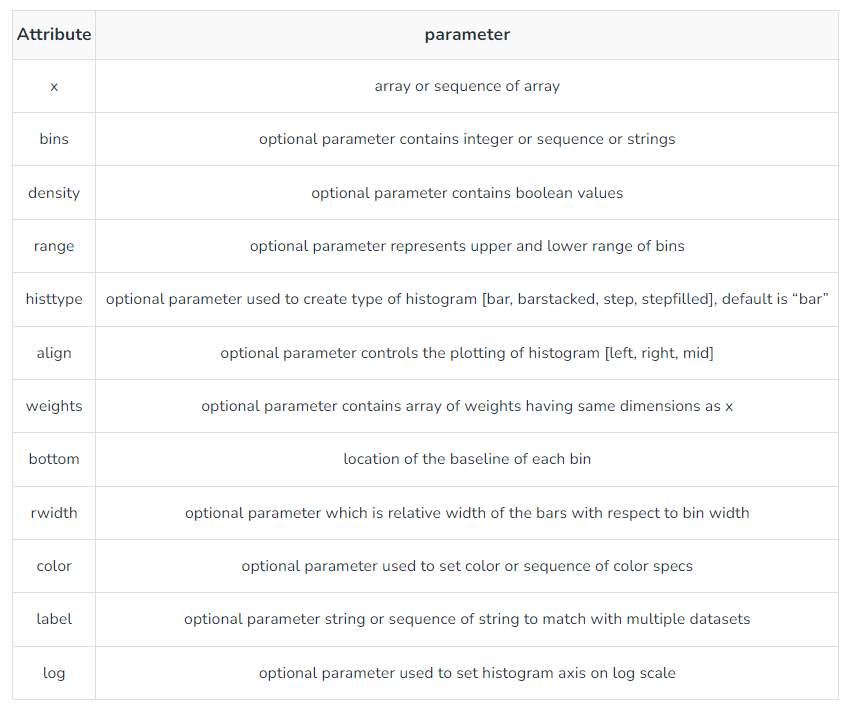

In [23]:
# este es el codigo para hacer la muestra 2D into a flat 1D to plot a histogram.
# en hist la lista a graficar es siempre 1D.
muestra_1D = [valor for fila in muestra for valor in fila]

In [24]:
flat_muestra

array([1.85, 1.8 , 1.8 , 1.8 , 1.73, 1.7 , 1.75, 1.76, 1.65, 1.69, 1.67,
       1.6 , 1.54, 1.57, 1.58, 1.59, 1.4 , 1.42, 1.45, 1.48])

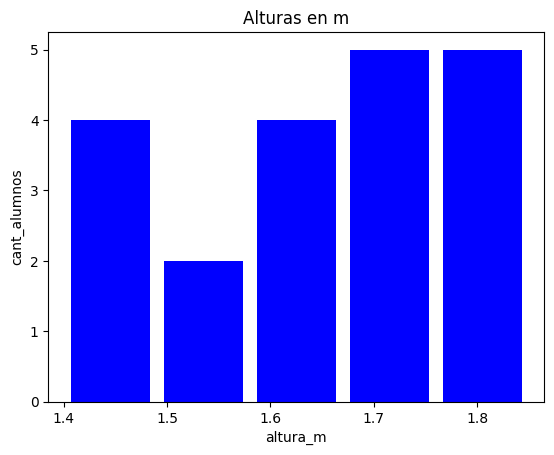

In [25]:
plt.hist(flat_muestra,bins=5,rwidth=0.85,color='BLUE')
plt.title('Alturas en m')
plt.xlabel('altura_m')
plt.ylabel('cant_alumnos')
plt.show()

#### Analisis del histograma
 - Podemos ver que el valor moda queda bien a la izquierda y es el que tiene la columna del histograma mas alta <br>
    - El valor modal es 1.8 esta bien a la izquierda<br>
    - La media es 1.64 esta en el medio del rango <br>
    - La mediana esta en 1.65<br>  

#### Distribucion Normal<br>
Cuando una muestra tiene una Distribucion Normal? <br>

- Una *distribucion normal* , tiene un sesgo *simetrico*
- Si lo partimos al medio, queda un espejo
- La *media* parte a la mitad la distribucion, y las partes son simetricas


3. Utilizando pandas describa el dataframe.

In [26]:
muestras_df = pd.DataFrame(muestra)
muestras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5 non-null      float64
 1   1       5 non-null      float64
 2   2       5 non-null      float64
 3   3       5 non-null      float64
dtypes: float64(4)
memory usage: 292.0 bytes


In [27]:
muestras_df.value_counts()

0     1     2     3   
1.40  1.42  1.45  1.48    1
1.54  1.57  1.58  1.59    1
1.65  1.69  1.67  1.60    1
1.73  1.70  1.75  1.76    1
1.85  1.80  1.80  1.80    1
Name: count, dtype: int64

Con los siguientes datos construye un df y un array que permitan describir adecuadamente la muestra.<br>
'Ingreso en miles' : 10.5	6.8	20.7	18.2	8.6	25.8	22.2	5.9	7.6	11.8 <br>
'Años de estudio': 17	18	21	16	16	21	16	14	18	18 <br>

In [28]:
ingreso_en_miles = [10.5,6.8,20.7,18.2,	8.6,25.8,22.2,5.9,7.6,11.8]
anios_de_estudio = [17,18,21,16,16,21,16,14,18,18]

In [29]:
print(len(ingreso_en_miles))
print(len(anios_de_estudio))

10
10


In [30]:
# df = (zip(anios_de_estudio,ingreso_en_miles)) # no puedo usar dict porque hay anios que se repiten
df = tuple(zip(ingreso_en_miles,anios_de_estudio))
df

((10.5, 17),
 (6.8, 18),
 (20.7, 21),
 (18.2, 16),
 (8.6, 16),
 (25.8, 21),
 (22.2, 16),
 (5.9, 14),
 (7.6, 18),
 (11.8, 18))

In [31]:
df_4 = pd.DataFrame(df,index=range(1,11),columns=[ 'ingreso_en_miles','anios_de_estudio'])
df_4

,ingreso_en_miles,anios_de_estudio
1,10.5,17
2,6.8,18
3,20.7,21
4,18.2,16
5,8.6,16
6,25.8,21
7,22.2,16
8,5.9,14
9,7.6,18
10,11.8,18


In [32]:
# para utilizar el df dentro del histograma podemos hacer un slice del def dentro.
df_4['anios_de_estudio']

1     17
2     18
3     21
4     16
5     16
6     21
7     16
8     14
9     18
10    18
Name: anios_de_estudio, dtype: int64

In [33]:
df_4['ingreso_en_miles']

1     10.5
2      6.8
3     20.7
4     18.2
5      8.6
6     25.8
7     22.2
8      5.9
9      7.6
10    11.8
Name: ingreso_en_miles, dtype: float64

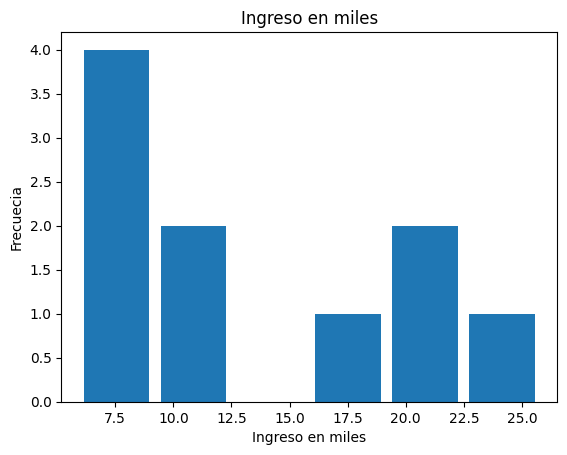

In [34]:
# 5. Realice un histograma para de 6 secciones para 'Ingreso en miles' y 'Años de estudio'.

plt.hist(ingreso_en_miles,bins=6,rwidth=0.85)
plt.title("Ingreso en miles", color= 'black')
plt.xlabel("Ingreso en miles")
plt.ylabel("Frecuecia")
plt.show()

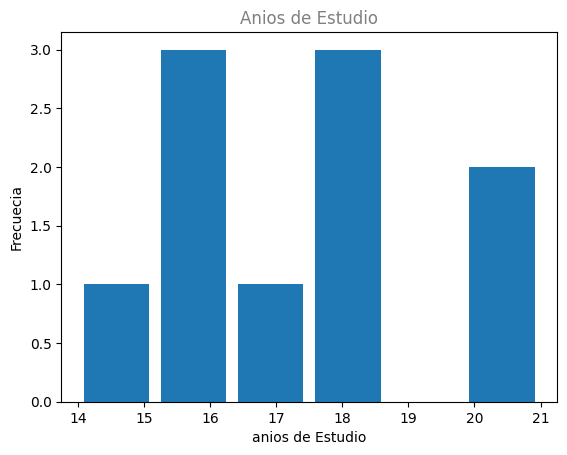

In [35]:
plt.hist(anios_de_estudio,bins=6,rwidth=0.85)
plt.title("Anios de Estudio", color= 'grey')
plt.xlabel("anios de Estudio")
plt.ylabel("Frecuecia")
plt.show()

6. Cálcula la media de 'Ingreso en miles' (df) utilizando pandas.

In [36]:
df_4['ingreso_en_miles'].mean()

13.809999999999999

7. Cálcula la media de 'Ingreso en miles' (array) utilizando numpy.

In [37]:
serie_ingreso = np.array(ingreso_en_miles)
serie_ingreso.mean()

13.809999999999999

In [38]:
df = np.array(df)
df

array([[10.5, 17. ],
       [ 6.8, 18. ],
       [20.7, 21. ],
       [18.2, 16. ],
       [ 8.6, 16. ],
       [25.8, 21. ],
       [22.2, 16. ],
       [ 5.9, 14. ],
       [ 7.6, 18. ],
       [11.8, 18. ]])

In [39]:
df[:,0]

array([10.5,  6.8, 20.7, 18.2,  8.6, 25.8, 22.2,  5.9,  7.6, 11.8])

In [40]:
# ingreso a la columna ingreso en miles
# array[fila,columna] =>  [fila1:fila8,columna1:columna2]

df_4.iloc[:,0] # ingreso en miles desde el array
df_4.loc[:,'ingreso_en_miles'] # son todas equivalentes

1     10.5
2      6.8
3     20.7
4     18.2
5      8.6
6     25.8
7     22.2
8      5.9
9      7.6
10    11.8
Name: ingreso_en_miles, dtype: float64

8. Agregue los siguientes valores extremos al df [ 50, 35 ], [ 120, 30 ]. ¿En cuanto vario la media?, ¿Qué conclusiones obtiene de este resultado sobre la media?

In [41]:
df_4.loc[11] = [50,35]
df_4.loc[12] = [120,30]
df_4

,ingreso_en_miles,anios_de_estudio
1,10.5,17
2,6.8,18
3,20.7,21
4,18.2,16
5,8.6,16
6,25.8,21
7,22.2,16
8,5.9,14
9,7.6,18
10,11.8,18


In [42]:
df_4['ingreso_en_miles'].mean()

25.675

In [43]:
ingreso_en_miles2 = [10.5,6.8,20.7,18.2,	8.6,25.8,22.2,5.9,7.6,11.8,50,120]
anios_de_estudio2 = [17,18,21,16,16,21,16,14,18,18,35,30]

In [44]:
serie_ingreso2 = np.array(ingreso_en_miles2)
serie_ingreso2.mean()

25.675

In [45]:
df_4.describe()

,ingreso_en_miles,anios_de_estudio
count,12.000000,12.000000
mean,25.675000,20.000000
std,32.150219,6.266796
min,5.900000,14.000000
25%,8.350000,16.000000
50%,15.000000,18.000000
75%,23.100000,21.000000
max,120.000000,35.000000


La *media* es sensible a valores extremos. Por lo que se ve afectada cuando agregamos esos valores a la muestra.

<function matplotlib.pyplot.show(close=None, block=None)>

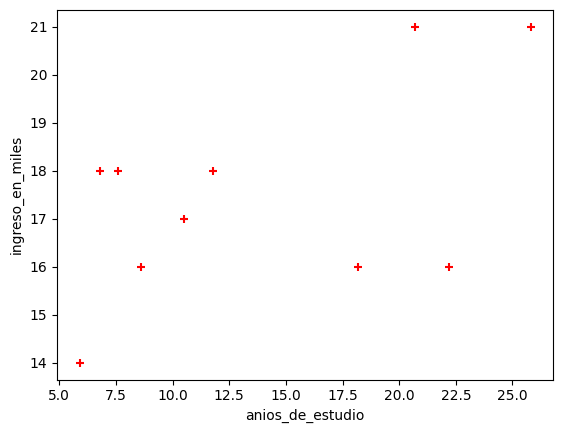

In [46]:
# scatter plot

plt.scatter(x=df[:,0],y=df[:,1],marker='+',color='red')
plt.ylabel('ingreso_en_miles')
plt.xlabel('anios_de_estudio')
plt.show